In [2]:
import os
import glob
import shutil
import random
import numpy as np
import pandas as pd
from os.path import join
from torch.utils.data import Dataset
import torch
try:
    from . import utils2 as U
except Exception:
    import utils as U
from abc import ABC
import configparser
import matplotlib.pyplot as plt


/Users/hanliying/opt/anaconda3/envs/pytorch-cpu/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
root = "./IMU/wisdm"
csv_files = glob.glob(join(root, "raw/watch/accel/*.txt"))
csv_files.sort()
print(csv_files)

dfs = []
for index, csv_file in enumerate(csv_files):
    df = pd.read_csv(csv_file, names=['userID', 'label', 'timestamp', 'x', 'y', 'z'], header=0)
    df['z'] = df['z'].str.replace(';','').astype(float)
    if index < 1/5 * len(csv_files): df['fold'] = 1
    elif index < 2/5 * len(csv_files): df['fold'] = 2
    elif index < 3/5 * len(csv_files): df['fold'] = 3
    elif index < 4/5 * len(csv_files): df['fold'] = 4
    else: df['fold'] = 5
    dfs.append(df)

df = pd.concat(dfs, axis=0, ignore_index=True)

['./IMU/wisdm/raw/watch/accel/data_1600_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1601_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1602_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1603_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1604_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1605_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1606_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1607_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1608_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1609_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1610_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1611_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1612_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1613_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1614_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1615_accel_watch.txt', './IMU/wisdm/raw/watch/accel/data_1616_accel_watch.txt', './IMU/wisdm/raw/watch/accel/d

In [5]:
# df.dropna()
lis_s = ['A', 'B', 'D', 'E', 'F', 'G', 'J', 'K']
# for i in range(len(lis_s)):
#     if i == 0:
#         tmp = df['label'] == lis_s[i]
#     else:
#         tmp = tmp | (df['label'] == lis_s[i])
# df = df[tmp]
# df = df[(df['label'] == 'A') | (df['label'] == 'B') | (df['label'] == 'D') | (df['label'] == 'E') \
#     | (df['label'] == 'F') | (df['label'] == 'G') | (df['label'] == 'J') | (df['label'] == 'K')]
# ABDEFGJK
# print(tmp)
# print(df[tmp])
# (3776995, 7)
# df = df.sort_values(by = ['userID', 'timestamp'], ignore_index=True)
df = df[df.label.isin(lis_s)]
df.shape
# df1 1678626

(1678626, 7)

In [6]:
accels = []
labels = []
folds = []
pairs = set(zip(df.userID, df.label))
# print(pairs)
for pair in pairs:
    # print(pair)
    # masked1 = df[df['userID'] == pair[0]]
    # masked2 = masked1[masked1['label'] == pair[1]]
    # df_temp = masked2[0:3600] # each activity is collected for 3 min = 3x60x20 frames
    start = 0
    end = 3500
    df_temp = df[(df['userID'] == pair[0]) & (df['label'] == pair[1])][start:end]
    num_sequence = (end - start) // 100
    
    for i in range(num_sequence):
        rows = df_temp.iloc[i * 100 : (i + 1) * 100]
        accel = rows[['x','y','z']].values.T
        print(accel.shape)
        assert len(set(rows['fold'].values)) == 1
        fold = set(rows['fold'].values).pop()
        # raise len(fold) == 1
        # print(df_temp)
        # print(accel)              
        accels.append(accel)
        labels.append(pair[1])
        folds.append(fold)
    
    # print(df_temp)
# accels = np.concatenate(accels, axis=0)
# accels = accels.transpose((0,2,1))


(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(3, 100)
(

In [121]:

# print(accels)
# print(labels)
# torch.tensor(x).dtype
# accels = [row.x,row.y,row.z]
b = np.array(labels)
len(accels)
# b.shape

14175

In [87]:
target = [0,1,1]
category = ['A','B','C']
classes = set(zip(target, category))
# classes = sorted(classes, key=lambda x: x[0])
# classes = [c[1] for c in classes]
# classes = sorted(set(category))
classes

{(0, 'A'), (1, 'B'), (1, 'C')}

In [ ]:
df_key = pd.read_csv("./IMU/wisdm/activity_key.txt", sep=' = ',names=['activity', 'label'], engine='python')
dict(df_key.values)

{'walking': 'A',
 'jogging': 'B',
 'stairs': 'C',
 'sitting': 'D',
 'standing': 'E',
 'typing': 'F',
 'teeth': 'G',
 'soup': 'H',
 'chips': 'I',
 'pasta': 'J',
 'drinking': 'K',
 'sandwich': 'L',
 'kicking': 'M',
 'catch': 'O',
 'dribbling': 'P',
 'writing': 'Q',
 'clapping': 'R',
 'folding': 'S'}

In [85]:
csv_file=['meta/esc50.csv','kitchen20.csv']
root=['ESC50','KITCHEN20']
for r, f in zip(root, csv_file):
    print(r,f)

ESC50 meta/esc50.csv
KITCHEN20 kitchen20.csv


In [4]:
torch.tensor(1).int()

tensor(1, dtype=torch.int32)

In [7]:
from multimodal import *

In [8]:
from torch.utils.data import DataLoader
from torch import nn
from torch import optim

time_window = 5
audio_rate = 16000
audio_input_length = int(audio_rate * time_window)

audio_set = ESC70Select(
    # root='./Audio/kitchen20/',
    root=['./Audio/ESC50', './Audio/kitchen20'],
    folds=[1, 2, 3, 4],
    transforms=lambda x : nn.functional.pad(x, ((audio_input_length - x.shape[1]) // 2, (audio_input_length - x.shape[1]) // 2)) if (x.shape[1] % 2) == 0 \
        else nn.functional.pad(x, ((audio_input_length - x.shape[1]) // 2, (audio_input_length - x.shape[1]) // 2 + 1)),  
    overwrite=False,
    use_bc_learning=False,
    audio_rate=audio_rate)

imu_set = WISDMSelect(
    folds=[1, 2, 3, 4],
    time_window=time_window,
    overwrite=False)

multimodal_set = MultimodalDataset(audio_set, imu_set, time_window=time_window)
print(multimodal_set.get_label_mapping())
data_loader = DataLoader(multimodal_set, batch_size=2, 
                            shuffle=True, num_workers=4)

num_window = 17280 # corresponding to 6 hours

./Audio/ESC50/meta/esc50.csv
./Audio/kitchen20/kitchen20.csv
loading  fold1
loading  fold2
loading  fold3
loading  fold4


/Users/hanliying/Documents/UCLA/Research/master-thesis-project/dataset/esc.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df[0].append(self.df[1:])


loading  fold1
loading  fold2
loading  fold3
loading  fold4
Loading...
{'brush_teeth': 0, 'click_mouse': 1, 'drink': 2, 'eat': 3, 'flush_toilet': 4, 'sit': 5, 'type': 6, 'walk': 7, 'wash': 8}


In [62]:
class AudioAE(nn.Module):
    """Autoencoder for Audio embeddings"""

    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv1d(1, 16, 9, stride=2, padding=2), nn.ReLU(), nn.BatchNorm1d(16),
            nn.Conv1d(16, 32, 9, stride=2, padding=2), nn.ReLU(), nn.BatchNorm1d(32),
            nn.Conv1d(32, 64, 9), nn.ReLU(), nn.BatchNorm1d(64)
            )
        self.decoder = nn.Sequential(
            nn.ConvTranspose1d(64, 32, 9), nn.ReLU(), nn.BatchNorm1d(32),
            nn.ConvTranspose1d(32, 16, 9, stride=2, padding=2, output_padding=1), nn.ReLU(), nn.BatchNorm1d(16),
            nn.ConvTranspose1d(16, 1, 9, stride=2, padding=2, output_padding=1), nn.ReLU(), nn.BatchNorm1d(1),
            nn.Tanh()
            )
 
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [63]:
audio_AE = AudioAE()

criterion = nn.MSELoss() # mean square error loss
optimizer = torch.optim.Adam(audio_AE.parameters(),
                                lr=1e-3, 
                                weight_decay=1e-5) # <--
train_loader = torch.utils.data.DataLoader(audio_set, 
                                            batch_size=32, 
                                            shuffle=True)
outputs = []
for epoch in range(100):
    for data in train_loader:
        sound, _ = data
        recon = audio_AE(sound)
        loss = criterion(recon, sound)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, sound, recon),)
outputs

Epoch:1, Loss:0.0176
Epoch:2, Loss:0.0044
Epoch:3, Loss:0.0024
Epoch:4, Loss:0.0026
Epoch:5, Loss:0.0029
Epoch:6, Loss:0.0043
Epoch:7, Loss:0.0038
Epoch:8, Loss:0.0049
Epoch:9, Loss:0.0041
Epoch:10, Loss:0.0019
Epoch:11, Loss:0.0015
Epoch:12, Loss:0.0018
Epoch:13, Loss:0.0016
Epoch:14, Loss:0.0012
Epoch:15, Loss:0.0024
Epoch:16, Loss:0.0023
Epoch:17, Loss:0.0014
Epoch:18, Loss:0.0009
Epoch:19, Loss:0.0040
Epoch:20, Loss:0.0025
Epoch:21, Loss:0.0010
Epoch:22, Loss:0.0026
Epoch:23, Loss:0.0038
Epoch:24, Loss:0.0013
Epoch:25, Loss:0.0012
Epoch:26, Loss:0.0008
Epoch:27, Loss:0.0018
Epoch:28, Loss:0.0017
Epoch:29, Loss:0.0022
Epoch:30, Loss:0.0007
Epoch:31, Loss:0.0023
Epoch:32, Loss:0.0008
Epoch:33, Loss:0.0007
Epoch:34, Loss:0.0014
Epoch:35, Loss:0.0013
Epoch:36, Loss:0.0008
Epoch:37, Loss:0.0012
Epoch:38, Loss:0.0010
Epoch:39, Loss:0.0007
Epoch:40, Loss:0.0013
Epoch:41, Loss:0.0016
Epoch:42, Loss:0.0010
Epoch:43, Loss:0.0006
Epoch:44, Loss:0.0004
Epoch:45, Loss:0.0003
Epoch:46, Loss:0.00

[(0,
  tensor([[[ 1.0266e-01,  1.0123e-01,  1.1060e-01,  ..., -5.4016e-02,
            -5.2460e-02, -5.0446e-02]],
  
          [[ 7.4219e-02,  2.5452e-02, -7.8339e-02,  ..., -6.1554e-02,
             8.0658e-02, -2.3193e-03]],
  
          [[ 1.2512e-03,  8.2397e-04,  6.7139e-04,  ...,  9.4910e-03,
            -1.0559e-02, -2.6276e-02]],
  
          ...,
  
          [[-6.6528e-03, -1.0681e-03, -9.7656e-04,  ..., -1.5137e-02,
             6.3477e-03,  4.4250e-03]],
  
          [[ 1.0986e-03,  1.2207e-03,  1.8005e-03,  ...,  3.2349e-03,
             2.1362e-03,  1.8311e-04]],
  
          [[-4.8218e-03, -3.7842e-03, -2.0752e-03,  ..., -6.7139e-04,
            -3.0518e-05, -1.7700e-03]]]),
  tensor([[[ 0.0041, -0.0333, -0.0060,  ...,  0.0073,  0.0170, -0.0273]],
  
          [[ 0.0044, -0.0252,  0.0397,  ...,  0.0002, -0.0115, -0.0240]],
  
          [[-0.0064, -0.0622, -0.0148,  ..., -0.0023,  0.0285, -0.0222]],
  
          ...,
  
          [[-0.0014, -0.0611, -0.0109,  ..., -0.001

In [104]:
audio_set_test = ESC70Select(
    # root='./Audio/kitchen20/',
    root=['./Audio/ESC50', './Audio/kitchen20'],
    folds=[5],
    transforms=lambda x : nn.functional.pad(x, ((audio_input_length - x.shape[1]) // 2, (audio_input_length - x.shape[1]) // 2)) if (x.shape[1] % 2) == 0 \
        else nn.functional.pad(x, ((audio_input_length - x.shape[1]) // 2, (audio_input_length - x.shape[1]) // 2 + 1)),  
    overwrite=False,
    use_bc_learning=False,
    audio_rate=audio_rate)

test_loader = torch.utils.data.DataLoader(audio_set_test,
                                          batch_size=32, 
                                          shuffle=True)

loss = []
y_sound = 0
true_sound = 0
for data in test_loader:
    sound, _ = data
    recon = audio_AE(sound)
    loss.append(criterion(recon, sound).item())
    y_sound = recon
    true_sound = sound
print("loss: ", np.mean(loss))


/Users/hanliying/Documents/UCLA/Research/master-thesis-project/dataset/esc.py:74: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df[0].append(self.df[1:])


loading  fold5
loss:  0.00032404850571765564


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(80000,) (80000,)


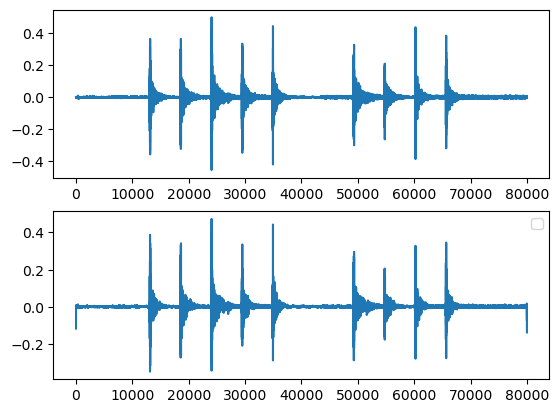

In [358]:
id = -1
a = true_sound.detach().numpy()
b = y_sound.detach().numpy()
# a = outputs[-1][1].detach().numpy()
a = a[-1].reshape(-1)
# b = outputs[-1][2].detach().numpy()
b = b[-1].reshape(-1)
print(a.shape,b.shape)

# true_sound = true_sound[0].item()
plt.subplot(2,1,1)
plt.plot(range(a.shape[-1]), a)
plt.subplot(2,1,2)
plt.plot(range(b.shape[-1]), b)
plt.legend()

In [5]:
sounds = np.concatenate([s.unsqueeze(0) for s in audio_set.sounds])
print(sounds.shape)
np.max(sounds)
max(np.max(sounds), -np.min(sounds))

(448, 1, 80000)


1.0

In [63]:
input1 = torch.randn(100,1,80000)
input2 = torch.randn(100,3,100)

e1 = nn.Sequential(
            nn.Conv1d(1, 16, 9, stride=2, padding=2), nn.ReLU(), nn.BatchNorm1d(16),
            nn.Conv1d(16, 32, 9, stride=2, padding=2), nn.ReLU(), nn.BatchNorm1d(32),
            nn.Conv1d(32, 64, 9), nn.ReLU(), nn.BatchNorm1d(64)
            )
d1 = nn.Sequential(
            nn.ConvTranspose1d(64, 32, 9), nn.ReLU(), nn.BatchNorm1d(32),
            nn.ConvTranspose1d(32, 16, 9, stride=2, padding=2, output_padding=1), nn.ReLU(), nn.BatchNorm1d(16),
            nn.ConvTranspose1d(16, 1, 9, stride=2, padding=2, output_padding=1), nn.ReLU(), nn.BatchNorm1d(1),
            nn.Tanh()
            )
embed1 = e1(input1)
output1 = d1(embed1)

e2 = nn.Sequential(
            nn.Conv1d(3, 32, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(32), #-> [n_batch, 32, 50]
            nn.Conv1d(32, 64, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(64), #-> [n_batch, 64, 25]
            nn.Conv1d(64, 128, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(128), #-> [n_batch, 128, 13]
            )
d2 = nn.Sequential(
            nn.ConvTranspose1d(128, 64, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(64), #-> [n_batch, 64, 25]
            nn.ConvTranspose1d(64, 32, 3, stride=2, padding=1, output_padding=1), nn.ReLU(), nn.BatchNorm1d(32), #-> [n_batch, 32, 50]
            nn.ConvTranspose1d(32, 3, 3, stride=2, padding=1, output_padding=1), nn.ReLU(), nn.BatchNorm1d(3), #-> [n_batch, 3, 100]
            nn.Tanh() #-> give outputs in [-1,1]
        )

embed2 = e2(input2)
output2 = d2(embed2)

# print(embed1.shape, embed2.shape)
# print(output1.shape, output2.shape)

conv1 = nn.Sequential(nn.Conv1d(3, 32, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(32))
conv2 = nn.Sequential(nn.Conv1d(32, 64, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(64))
conv3 = nn.Sequential(nn.Conv1d(64, 128, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(128))

pool = nn.MaxPool1d(2, stride=2, return_indices=True)
unpool = nn.MaxUnpool1d(2, stride=2)

inv_conv3 = nn.Sequential(nn.ConvTranspose1d(128, 64, 3, stride=2, padding=1, output_padding=1), nn.ReLU(), nn.BatchNorm1d(64))
inv_conv2 = nn.Sequential(nn.ConvTranspose1d(64, 32, 3, stride=2, padding=1), nn.ReLU(), nn.BatchNorm1d(32))
inv_conv1 = nn.Sequential(nn.ConvTranspose1d(32, 3, 3, stride=2, padding=1, output_padding=1), nn.ReLU(), nn.BatchNorm1d(3))

conv1_output = conv1(input2)
pool1_output, indices1 = pool(conv1_output)

conv2_output = conv2(pool1_output)
pool2_output, indices2 = pool(conv2_output)

conv3_output = conv3(pool2_output)
pool3_output, indices3 = pool(conv3_output)

unpool3_output = unpool(pool3_output, indices3, output_size=conv3_output.size())
inv_conv3_output = inv_conv3(unpool3_output)

unpool2_output = unpool(inv_conv3_output, indices2, output_size=conv2_output.size())
inv_conv2_output = inv_conv2(unpool2_output)

unpool1_output = unpool(inv_conv2_output, indices1, output_size=conv1_output.size())
inv_conv1_output = inv_conv1(unpool1_output)

print(conv1_output.shape)
print(pool1_output.shape)
print(conv2_output.shape)
print(pool2_output.shape)
print(conv3_output.shape)
print(pool3_output.shape)
print(unpool3_output.shape)
print(inv_conv3_output.shape)
print(unpool2_output.shape)
print(inv_conv2_output.shape)
print(unpool1_output.shape)
print(inv_conv1_output.shape)

print(pool3_output.squeeze(0).shape)
pred = nn.Linear(128, 5)(pool3_output.squeeze(-1))
print(pred.shape)




torch.Size([100, 32, 50])
torch.Size([100, 32, 25])
torch.Size([100, 64, 13])
torch.Size([100, 64, 6])
torch.Size([100, 128, 3])
torch.Size([100, 128, 1])
torch.Size([100, 128, 3])
torch.Size([100, 64, 6])
torch.Size([100, 64, 13])
torch.Size([100, 32, 25])
torch.Size([100, 32, 50])
torch.Size([100, 3, 100])
torch.Size([100, 128, 1])
torch.Size([100, 5])


In [299]:
torch.save(audio_AE.state_dict(), './saved_model/audio_AE_parameter.pkl')

In [440]:
action_probs = {}
action_probs['sit'] = 0.32
action_probs['type'] = 0.32
action_probs['click_mouse'] = 0.32
action_probs['drink'] = 0.04
assert sum(action_probs.values()) == 1

np.random.rand()

0.0739513550858083

In [11]:
import datetime
t = datetime.time(4, 15, 0)
print(t)
seconds = (t.hour * 60 + t.minute) * 60 + t.second
print(seconds)
t = datetime.datetime.strptime("04:15", "%H:%M").time()
seconds = (t.hour * 60 + t.minute) * 60 + t.second
print(seconds)

print('./saved_model/multimodal_embed_model_{}-{}.pt'.format(datetime.datetime.now().date().month, datetime.datetime.now().date().day))

04:15:00
15300
15300
./saved_model/multimodal_embed_model_3-3.pt


In [31]:
sum([1,2])

3

In [37]:
df_1 = pd.DataFrame({"category": ["no_sound" for _ in range(40)],
                     "fold": [1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5],
                    "path": ["audio/1-1-A.wav", "audio/1-1-B.wav", "audio/1-1-C.wav", "audio/1-1-D.wav", "audio/1-1-E.wav", "audio/1-1-F.wav", "audio/1-1-G.wav", "audio/1-1-H.wav",
                             "audio/2-2-A.wav", "audio/2-2-B.wav", "audio/2-2-C.wav", "audio/2-2-D.wav", "audio/2-2-E.wav", "audio/2-2-F.wav", "audio/2-2-G.wav", "audio/2-2-H.wav",
                             "audio/3-3-A.wav", "audio/3-3-B.wav", "audio/3-3-C.wav", "audio/3-3-D.wav", "audio/3-3-E.wav", "audio/3-3-F.wav", "audio/3-3-G.wav", "audio/3-3-H.wav",
                             "audio/4-4-A.wav", "audio/4-4-B.wav", "audio/4-4-C.wav", "audio/4-4-D.wav", "audio/4-4-E.wav", "audio/4-4-F.wav", "audio/4-4-G.wav", "audio/4-4-H.wav",
                             "audio/5-5-A.wav", "audio/5-5-B.wav", "audio/5-5-C.wav", "audio/5-5-D.wav", "audio/5-5-E.wav", "audio/5-5-F.wav", "audio/5-5-G.wav", "audio/5-5-H.wav"],
                    "target": [0 for _ in range(40)]})
df_1.to_csv("silent_sound.csv")

In [ ]:
criterion = nn.MSELoss() # mean square error loss
optimizer = torch.optim.Adam(imu_AE.parameters(),
                                lr=1e-3, 
                                weight_decay=1e-5) # <--
imu_train_loader = torch.utils.data.DataLoader(imu_set, 
                                            batch_size=32, 
                                            shuffle=True)
outputs = []
for epoch in range(100):
    for data in imu_train_loader:
        accel, _ = data
        recon = imu_AE(accel)
        loss = criterion(recon, accel)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
    outputs.append((epoch, accel, recon),)

In [ ]:
# Plot training data
id = 11
acc = outputs[-1][1].detach().numpy()
true_x, true_y, true_z = acc[id][0], acc[id][1], acc[id][2]
recon_acc = outputs[-1][2].detach().numpy()
x, y, z = recon_acc[id][0], recon_acc[id][1], recon_acc[id][2]
print(x.shape,y.shape)

# Plot test data
# id = 6
# acc = true_acc_list[-1].detach().numpy()
# recon_acc = recon_acc_list[-1].detach().numpy()
# true_x, true_y, true_z = acc[id][0], acc[id][1], acc[id][2]
# x, y, z = recon_acc[id][0], recon_acc[id][1], recon_acc[id][2]


# true_sound = true_sound[0].item()
# plt.plot(range(a.shape[-1]), a)
# plt.plot(range(b.shape[-1]), b)
plt.subplot(3,1,1)
plt.plot(range(x.shape[-1]), true_x)
plt.plot(range(x.shape[-1]), x)
plt.title("x")
plt.legend(["ground truth", "recon"])

plt.subplot(3,1,2)
plt.plot(range(x.shape[-1]), true_y)
plt.plot(range(x.shape[-1]), y)
plt.title("y")
plt.legend(["ground truth", "recon"])

plt.subplot(3,1,3)
plt.plot(range(x.shape[-1]), true_z)
plt.plot(range(x.shape[-1]), z)
plt.title("z")
plt.legend(["ground truth", "recon"])

In [68]:
input3 = torch.randn(1,256,11)
aa = nn.AdaptiveAvgPool1d(1)(input3)
aa.shape

torch.Size([1, 256, 1])